# Getting Started with pandas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from pandas import Series, DataFrame

## Introduction to pandas Data Structures

### Series

0    4
1    6
2   -2
3    8
dtype: int64


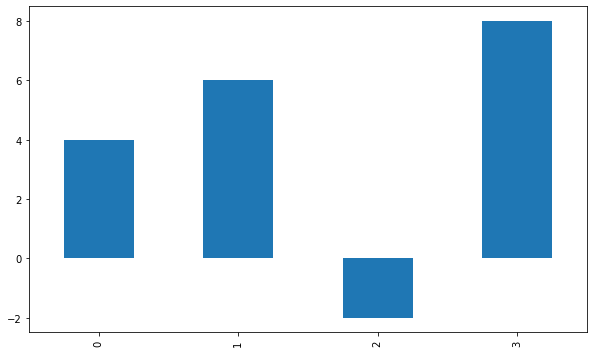

In [0]:
obj = pd.Series([4, 6, -2, 8])
print(obj)
obj.plot.bar()


In [0]:
print(obj.values)
print(obj.index)  # like range(4)

[ 4  6 -2  8]
RangeIndex(start=0, stop=4, step=1)


In [0]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


In [0]:
print(obj2['a'])
obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

-5
c    3
a   -5
d    6
dtype: int64


In [0]:
print(obj2[obj2 > 0])


d    6
b    7
c    3
dtype: int64


In [0]:
print(obj2 * 2)
print(np.exp(obj2))

d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [0]:
'b' in obj2


True

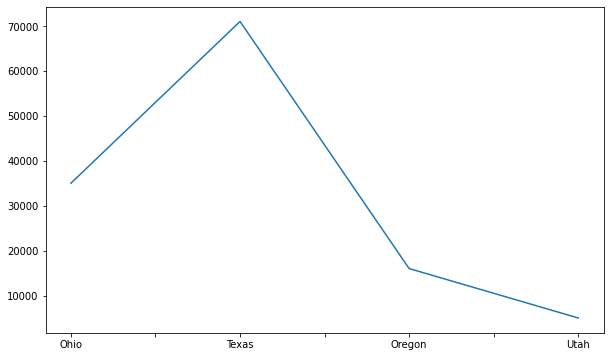

In [0]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3.plot()

In [0]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj3 = pd.Series(sdata, index=states)
obj3

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [0]:
pd.isnull(obj4)
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [0]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

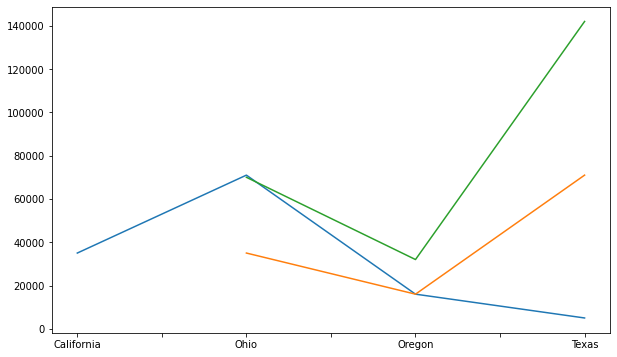

In [0]:
obj3.plot()
obj4.plot()
(obj3 + obj4).plot()

In [0]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [0]:
obj
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

### DataFrame

In [0]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1500, 1700, 3600, 240, 2000, 3200]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1500
1,Ohio,2001,1700
2,Ohio,2002,3600
3,Nevada,2001,240
4,Nevada,2002,2000
5,Nevada,2003,3200


In [0]:
frame

,state,year,pop
0,Ohio,2000,1500
1,Ohio,2001,1700
2,Ohio,2002,3600
3,Nevada,2001,240
4,Nevada,2002,2000
5,Nevada,2003,3200


In [0]:
frame.head()

,state,year,pop
0,Ohio,2000,1500
1,Ohio,2001,1700
2,Ohio,2002,3600
3,Nevada,2001,240
4,Nevada,2002,2000


In [0]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1500
1,2001,Ohio,1700
2,2002,Ohio,3600
3,2001,Nevada,240
4,2002,Nevada,2000
5,2003,Nevada,3200


In [0]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2


,year,state,pop,debt
one,2000,Ohio,1500,NaN
two,2001,Ohio,1700,NaN
three,2002,Ohio,3600,NaN
four,2001,Nevada,240,NaN
five,2002,Nevada,2000,NaN
six,2003,Nevada,3200,NaN


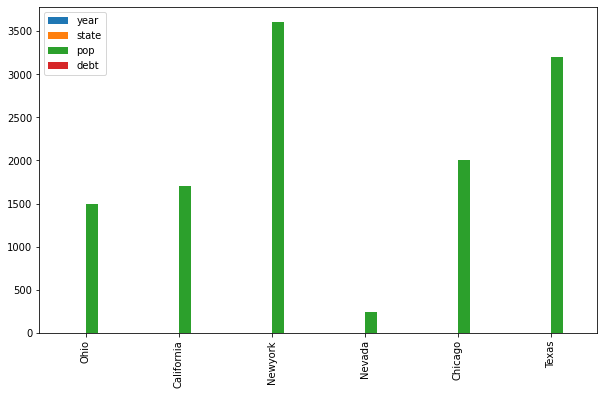

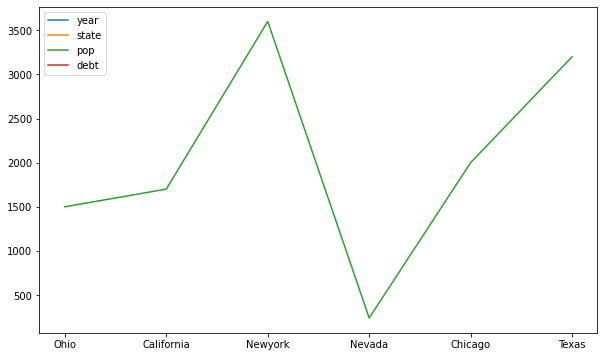

In [0]:
frame_p = pd.DataFrame({'pop': [1500, 1700, 3600, 240, 2000, 3200]}, columns=['year', 'state', 'pop', 'debt'],
                      index=['Ohio', 'California', 'Newyork', 'Nevada', 'Chicago','Texas'])
frame_p.plot.bar()
frame_p.plot()



In [0]:
print(frame2['state'])
print(frame2.year)

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64


In [0]:
frame2.loc['three']

year     2002
state    Ohio
pop      3600
debt      NaN
Name: three, dtype: object

In [0]:
frame2['debt'] = 16.5
frame2


,year,state,pop,debt
one,2000,Ohio,1500,16.5
two,2001,Ohio,1700,16.5
three,2002,Ohio,3600,16.5
four,2001,Nevada,240,16.5
five,2002,Nevada,2000,16.5
six,2003,Nevada,3200,16.5


In [0]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1500,0.0
two,2001,Ohio,1700,1.0
three,2002,Ohio,3600,2.0
four,2001,Nevada,240,3.0
five,2002,Nevada,2000,4.0
six,2003,Nevada,3200,5.0


In [0]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1500,NaN
two,2001,Ohio,1700,-1.2
three,2002,Ohio,3600,NaN
four,2001,Nevada,240,-1.5
five,2002,Nevada,2000,-1.7
six,2003,Nevada,3200,NaN


In [0]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1500,NaN,True
two,2001,Ohio,1700,-1.2,True
three,2002,Ohio,3600,NaN,True
four,2001,Nevada,240,-1.5,False
five,2002,Nevada,2000,-1.7,False
six,2003,Nevada,3200,NaN,False


In [0]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [0]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [0]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [0]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [0]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


### Index Objects

index[1] = 'd'  # TypeError

## Essential Functionality

### Reindexing

In [0]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [0]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

f   NaN
g   NaN
h   NaN
i   NaN
k   NaN
dtype: float64

In [0]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 1, 2])
obj3


0      blue
1    purple
2    yellow
dtype: object

In [0]:
obj3.reindex(range(6), method='ffill')

0      blue
1    purple
2    yellow
3    yellow
4    yellow
5    yellow
dtype: object

In [0]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [0]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [0]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Dropping Entries from an Axis

In [0]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [0]:
data.drop(['Colorado'])

,one,two,three,four
Ohio,0,1,2,3
Utah,8,9,10,11
New York,12,13,14,15


In [0]:
data.drop('two', axis = 1)


,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [0]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, Selection, and Filtering

In [0]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [0]:
data['two']


Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [0]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [0]:
data[data['three'] > 5]['three']

Colorado     6
Utah        10
New York    14
Name: three, dtype: int64

In [0]:
data < 5


,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [0]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection with loc and iloc

In [0]:
data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [0]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [0]:
data.iloc[2, [3, 0, 1]]


four    11
one      8
two      9
Name: Utah, dtype: int64

In [0]:
data.iloc[2]


one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [0]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,4,5
Utah,11,8,9


### Arithmetic and Data Alignment

In [0]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
s1
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [0]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [0]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [0]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [0]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


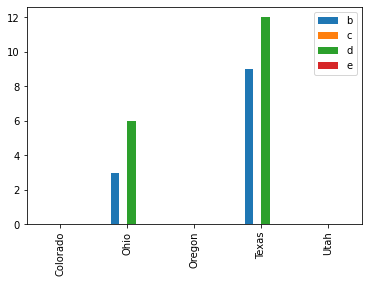

In [0]:
(df1 + df2).plot.bar()

#### Operations between DataFrame and Series

In [0]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame


,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [0]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [0]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [0]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
print(series2)
frame + series2

b    0
e    1
f    2
dtype: int64


,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


### Function Application and Mapping

In [0]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame


,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [0]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [0]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


### Sorting and Ranking

In [0]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj


d    0
a    1
b    2
c    3
dtype: int64

In [0]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [0]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()


,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [0]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [0]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [0]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [0]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame


,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [0]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


## Summarizing and Computing Descriptive Statistics

In [0]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,2.2
b,7.10,-4.5
c,3.30,4.4
d,0.75,-1.3


,one,two
count,4.000000,4.000000
mean,3.137500,0.200000
std,2.854638,3.914929
min,0.750000,-4.500000
25%,1.237500,-2.100000
50%,2.350000,0.450000
75%,4.250000,2.750000
max,7.100000,4.400000


In [0]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [0]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [0]:
df.mean(axis='columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [0]:
df.idxmax()

one    b
two    d
dtype: object

In [0]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [0]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [0]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()